<a href="https://colab.research.google.com/github/marcelogarret/reconpad/blob/main/aula8a_titanic_garret_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [3]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
# train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

# train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Name_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Name_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Name_Master'] = train['Name'].str.contains("Master").astype(int)
train['Name_Col'] = train['Name'].str.contains("Col").astype(int)
train['Name_Major'] = train['Name'].str.contains("Major").astype(int)
train['Name_Mr'] = train['Name'].str.contains("Mr").astype(int)

train['Sex_Bin'] = train['Sex'].map(transformar_sexo)

train = train.drop(['Embarked', 'Cabin', 'Name', 'Sex', 'Ticket', 'PassengerId'], axis=1)

In [7]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Miss',
       'Name_Mrs', 'Name_Master', 'Name_Col', 'Name_Major', 'Name_Mr',
       'Sex_Bin'],
      dtype='object')

In [8]:
train.dtypes

Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Name_Miss        int64
Name_Mrs         int64
Name_Master      int64
Name_Col         int64
Name_Major       int64
Name_Mr          int64
Sex_Bin          int64
dtype: object

In [9]:
# test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
# test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

# test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

test['Name_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Name_Mrs'] = test['Name'].str.contains("Mrs").astype(int)

test['Name_Master'] = test['Name'].str.contains("Master").astype(int)
test['Name_Col'] = test['Name'].str.contains("Col").astype(int)
test['Name_Major'] = test['Name'].str.contains("Major").astype(int)
test['Name_Mr'] = test['Name'].str.contains("Mr").astype(int)

test['Sex_Bin'] = test['Sex'].map(transformar_sexo)

test = test.drop(['Embarked', 'Cabin', 'Name', 'Sex', 'Ticket', 'PassengerId'], axis=1)

In [10]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Miss', 'Name_Mrs',
       'Name_Master', 'Name_Col', 'Name_Major', 'Name_Mr', 'Sex_Bin'],
      dtype='object')

In [11]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Miss', 'Name_Mrs',
       'Name_Master', 'Name_Col', 'Name_Major', 'Name_Mr', 'Sex_Bin'],
      dtype='object')

In [12]:
for column in X.columns:
  print(f"{column:>12} {len(set(X[column])):4} {X[column].dtype}")

      Pclass    3 int64
         Age  265 float64
       SibSp    7 int64
       Parch    7 int64
        Fare  248 float64
   Name_Miss    2 int64
    Name_Mrs    2 int64
 Name_Master    2 int64
    Name_Col    2 int64
  Name_Major    2 int64
     Name_Mr    2 int64
     Sex_Bin    2 int64


In [13]:
for column in X.columns:
  print(f"{column:>12} {sum(X[column].isnull())}")

      Pclass 0
         Age 177
       SibSp 0
       Parch 0
        Fare 0
   Name_Miss 0
    Name_Mrs 0
 Name_Master 0
    Name_Col 0
  Name_Major 0
     Name_Mr 0
     Sex_Bin 0


In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
XLimpo = imputer.fit_transform(X)
XLimpo

array([[ 3., 22.,  1., ...,  0.,  1.,  0.],
       [ 1., 38.,  1., ...,  0.,  1.,  1.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  0.,  1.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [15]:
for column in test.columns:
  print(f"{column:>12} {sum(test[column].isnull())}")

      Pclass 0
         Age 86
       SibSp 0
       Parch 0
        Fare 1
   Name_Miss 0
    Name_Mrs 0
 Name_Master 0
    Name_Col 0
  Name_Major 0
     Name_Mr 0
     Sex_Bin 0


In [16]:
testLimpo = imputer.fit_transform(test)
testLimpo

array([[ 3. , 34.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  1. ,  1. ],
       [ 2. , 62. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 27. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 27. ,  1. , ...,  0. ,  0. ,  0. ]])

In [17]:
import numpy as np
Xtratado = np.array(XLimpo)
Xtratado.shape

(891, 12)

In [18]:
testtratado = np.array(testLimpo)
testtratado.shape

(418, 12)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtratado_scaler = scaler.fit_transform(Xtratado)
Xtratado_scaler

array([[ 0.82737724, -0.56573646,  0.43279337, ..., -0.0474312 ,
         0.6141052 , -0.73769513],
       [-1.56610693,  0.66386103,  0.43279337, ..., -0.0474312 ,
         0.6141052 ,  1.35557354],
       [ 0.82737724, -0.25833709, -0.4745452 , ..., -0.0474312 ,
        -1.6283855 ,  1.35557354],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -0.0474312 ,
        -1.6283855 ,  1.35557354],
       [-1.56610693, -0.25833709, -0.4745452 , ..., -0.0474312 ,
         0.6141052 , -0.73769513],
       [ 0.82737724,  0.20276197, -0.4745452 , ..., -0.0474312 ,
         0.6141052 , -0.73769513]])

In [20]:
testtratado_scaler = scaler.fit_transform(testtratado)
testtratado_scaler

array([[ 0.87348191,  0.38623105, -0.49947002, ...,  0.        ,
         0.58287528, -0.75592895],
       [ 0.87348191,  1.37137004,  0.61699237, ...,  0.        ,
         0.58287528,  1.32287566],
       [-0.31581919,  2.55353683, -0.49947002, ...,  0.        ,
         0.58287528, -0.75592895],
       ...,
       [ 0.87348191,  0.70147553, -0.49947002, ...,  0.        ,
         0.58287528, -0.75592895],
       [ 0.87348191, -0.20485235, -0.49947002, ...,  0.        ,
         0.58287528, -0.75592895],
       [ 0.87348191, -0.20485235,  0.61699237, ...,  0.        ,
        -1.71563289, -0.75592895]])

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

modelo1 = DecisionTreeClassifier()
modelo2 = RandomForestClassifier()
modelo3 = LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score

modelo1.fit(Xtratado_scaler, y)
ypred = modelo1.predict(Xtratado_scaler)
accuracy_score(y, ypred)

0.9842873176206509

In [23]:
modelo2.fit(Xtratado_scaler, y)
ypred = modelo2.predict(Xtratado_scaler)
accuracy_score(y, ypred)

0.9842873176206509

In [24]:
modelo3.fit(Xtratado_scaler, y)
ypred = modelo3.predict(Xtratado_scaler)
accuracy_score(y, ypred)

0.8282828282828283

In [25]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(modelo1, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00579381, 0.00364399, 0.00517106, 0.00318837, 0.00328088]),
  'score_time': array([0.00418663, 0.00191903, 0.00125456, 0.00117207, 0.00109363]),
  'test_score': array([0.72067039, 0.79213483, 0.86516854, 0.7247191 , 0.79775281])},
 0.7800891343920658)

In [26]:
scores = cross_validate(modelo2, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.22798991, 0.20199585, 0.20474434, 0.20368576, 0.21108651]),
  'score_time': array([0.01198268, 0.0095892 , 0.00930619, 0.00918221, 0.00931787]),
  'test_score': array([0.7877095 , 0.79775281, 0.88202247, 0.75842697, 0.83146067])},
 0.8114744837110036)

In [27]:
scores = cross_validate(modelo3, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00841427, 0.00490761, 0.00596023, 0.00700212, 0.00577068]),
  'score_time': array([0.00106835, 0.000947  , 0.00090671, 0.00100374, 0.00088906]),
  'test_score': array([0.83240223, 0.79213483, 0.79775281, 0.78651685, 0.86516854])},
 0.8147950536689473)

In [28]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'tol': [1e-3, 1e-4],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [1000, 2000],
    'fit_intercept': [True, False]
}

modeloGS1 = GridSearchCV(modelo3, param_grid=parametros, verbose=1)
scores = cross_validate(modeloGS1, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


({'fit_time': array([4.27281785, 3.42571855, 3.55012918, 3.82132173, 3.73785424]),
  'score_time': array([0.00104976, 0.0014255 , 0.00109053, 0.0010376 , 0.00092244]),
  'test_score': array([0.83240223, 0.79213483, 0.79775281, 0.78651685, 0.86516854])},
 0.8147950536689473)

In [29]:
modeloGS1.fit(Xtratado_scaler, y)
modeloGS1.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'fit_intercept': True, 'max_iter': 1000, 'solver': 'lbfgs', 'tol': 0.001}

In [30]:
submission = pd.read_csv('gender_submission.csv')
ypred = modeloGS1.predict(testtratado_scaler)
submission['Survived'] = ypred
submission.to_csv('tree_submission_logreg.csv', index=False)

In [31]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_depth': [None, 5, 10, 15],
    'splitter': ['best', 'random'],
    # 'max_features': [None, 'auto', 'sqrt', 'log2']
}

modeloGS2 = GridSearchCV(modelo1, param_grid=parametros, verbose=1)
scores = cross_validate(modeloGS2, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


({'fit_time': array([0.12888765, 0.10960388, 0.1115849 , 0.11394405, 0.11628604]),
  'score_time': array([0.00078845, 0.00070763, 0.00074911, 0.0007658 , 0.00102973]),
  'test_score': array([0.75418994, 0.82022472, 0.81460674, 0.80337079, 0.86516854])},
 0.8115121461301864)

In [32]:
modeloGS2.fit(Xtratado_scaler, y)
modeloGS2.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 5, 'splitter': 'best'}

In [33]:
submission = pd.read_csv('gender_submission.csv')
ypred = modeloGS2.predict(testtratado_scaler)
submission['Survived'] = ypred
submission.to_csv('tree_submission_dectree.csv', index=False)

In [39]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_depth': [None, 5, 10, 15],
    'n_estimators': [300, 500, 1000, 1500, 2000],
    # 'max_features': [None, 'auto', 'sqrt', 'log2']
}

modeloGS3 = GridSearchCV(modelo2, param_grid=parametros, verbose=1)
scores = cross_validate(modeloGS3, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'fit_time': array([212.92387462, 213.01619744, 214.90357161, 220.40907049,
         218.27444243]),
  'score_time': array([0.02366567, 0.1240449 , 0.10892344, 0.14992762, 0.11650085]),
  'test_score': array([0.83798883, 0.8258427 , 0.82022472, 0.79775281, 0.85393258])},
 0.8271483271608814)

In [40]:
modeloGS3.fit(Xtratado_scaler, y)
modeloGS3.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 10, 'n_estimators': 2000}

In [42]:
submission = pd.read_csv('gender_submission.csv')
ypred = modeloGS3.predict(testtratado_scaler)
submission['Survived'] = ypred
submission.to_csv('tree_submission_randfor.csv', index=False)

In [45]:
score = 0.7799
(score-0.65)*125

16.2375

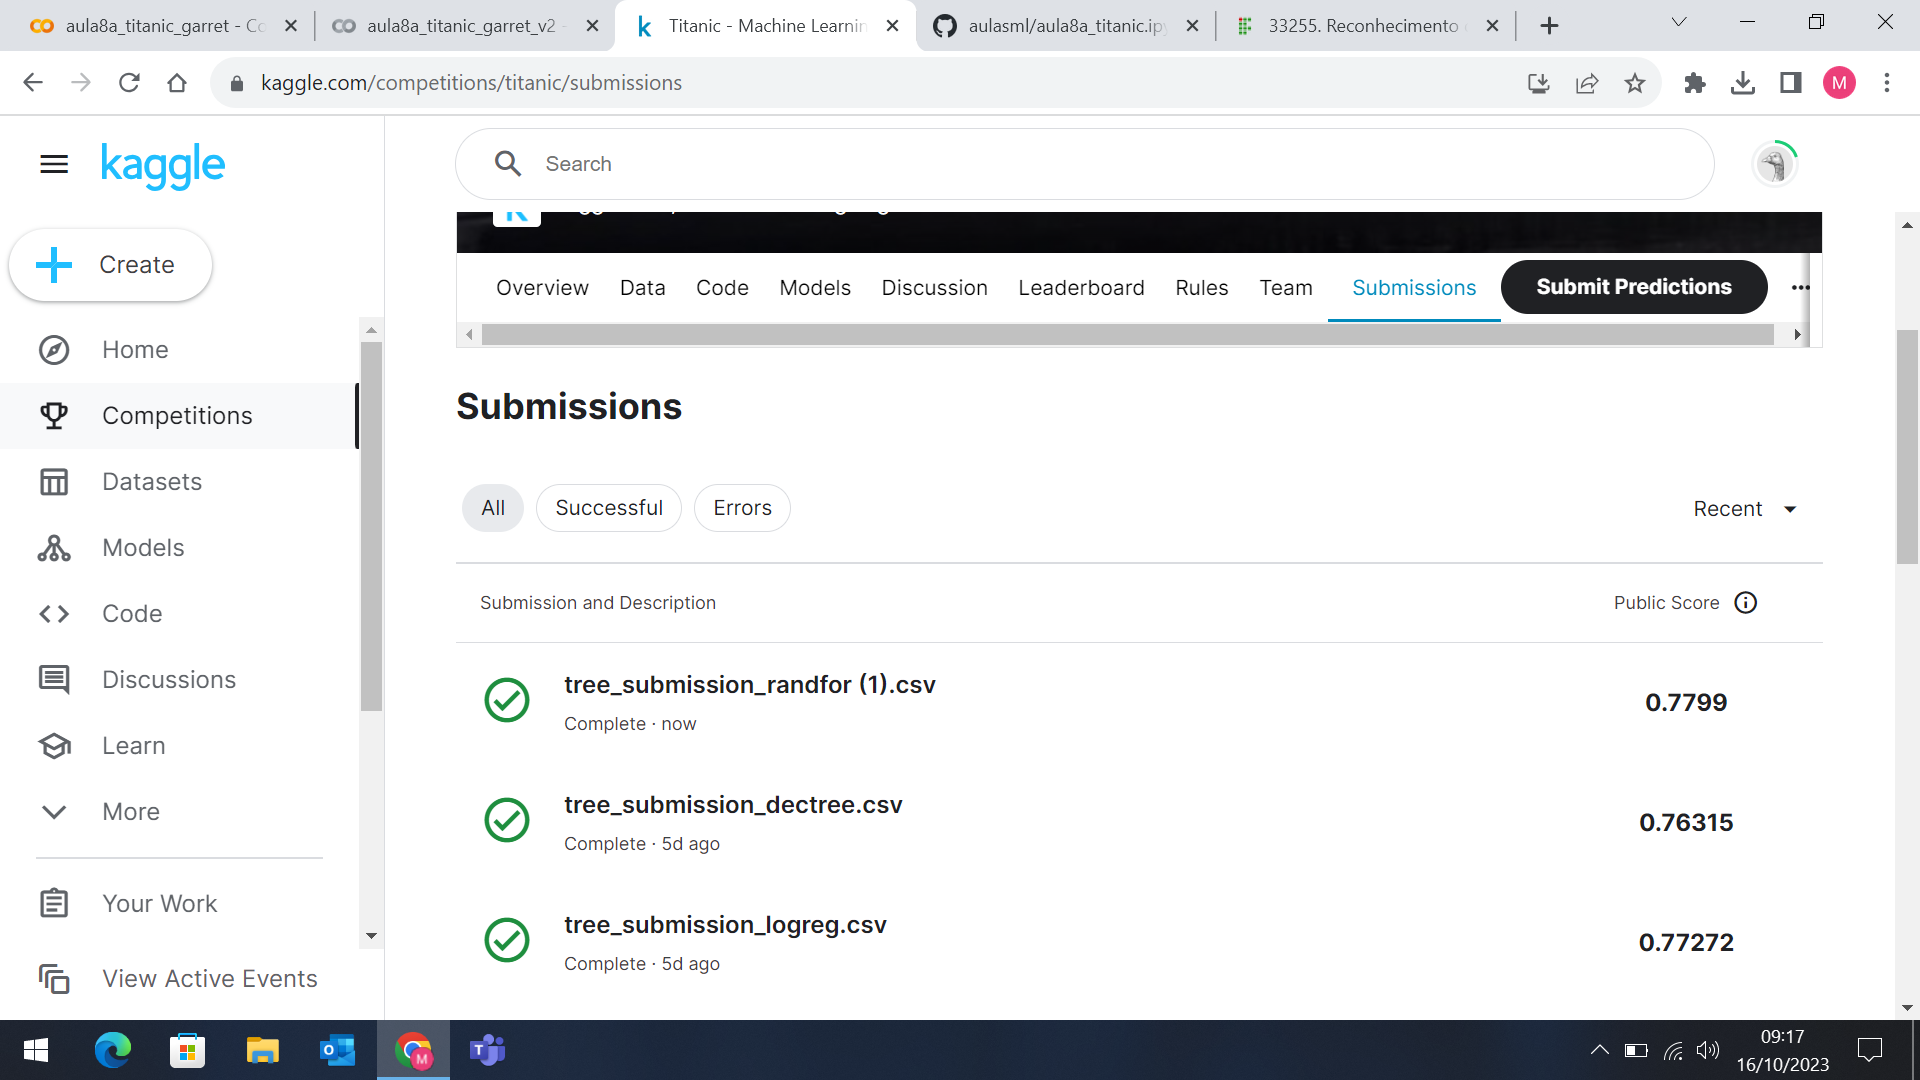